## Exploratory Data Analysis

### Importing libraries

In [1]:
# import libraries as needed

### 1. Read in the data set and perform preliminary checks

In [2]:
import pandas as pd 

# how many samples do we have?
# how many features do we have?
# what are the classes 
# how many classes do we have?
# how many samples of each class? are they balanced?

# read the dataset
df = pd.read_csv("iris.csv")
print(df)

classes = pd.unique(df['variety'])
num_classes = len(classes)
each_class = df['variety'].value_counts()

print(classes)
print(num_classes)
print(each_class)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
['Setosa' 'Versicolor' 'Virginica']
3
Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64


In [3]:
print(df.info())

# what are the names of the features
# what are the types of fetures?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
df.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [5]:
# change categorical values of variety to numeric values

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['variety'] = labelencoder.fit_transform(df['variety']) #fitting and transforming the desired categorical column.

print(df['variety'].unique())

df

[0 1 2]


sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

### 2. Check missing values, outliers and statistics

In [6]:
# are there any missing values?
# if so, what are you going to do about the missing values?

df.isna().apply(pd.value_counts)

sepal.length  sepal.width  petal.length  petal.width  variety
False           150          150           150          150      150

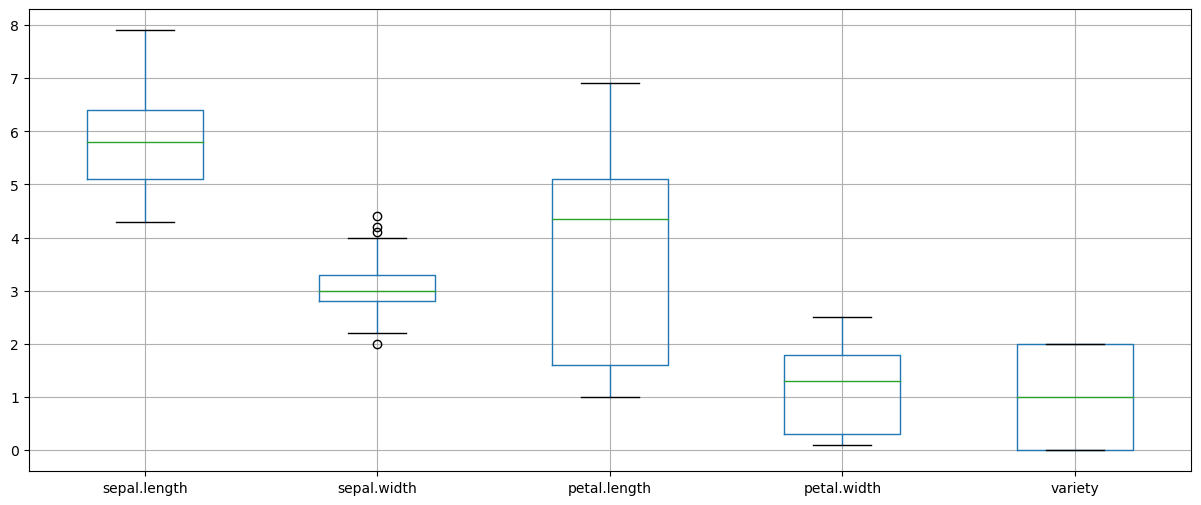

count      mean       std  min  25%   50%  75%  max
sepal.length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal.width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal.length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal.width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
variety       150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0

In [7]:
from matplotlib import pyplot as plt

# are there outliers?
# if so, what are you going to do about the outliers
# are there anomolies in the statistics?
# if so, what are you going to do about the outliers

df.boxplot(figsize = (15,6))

#plt.savefig('plots/i0.png')
plt.show()
df.describe().T


In [8]:
#IQR is the interquartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# let's see how many outliers are in every column
df2 = ((df < (Q1 - 1.5 * IQR)).sum()) 
df3 = ((df > (Q3 + 1.5 * IQR)).sum())
print(df2)
print(df3)

sepal.length    0
sepal.width     1
petal.length    0
petal.width     0
variety         0
dtype: int64
sepal.length    0
sepal.width     3
petal.length    0
petal.width     0
variety         0
dtype: int64


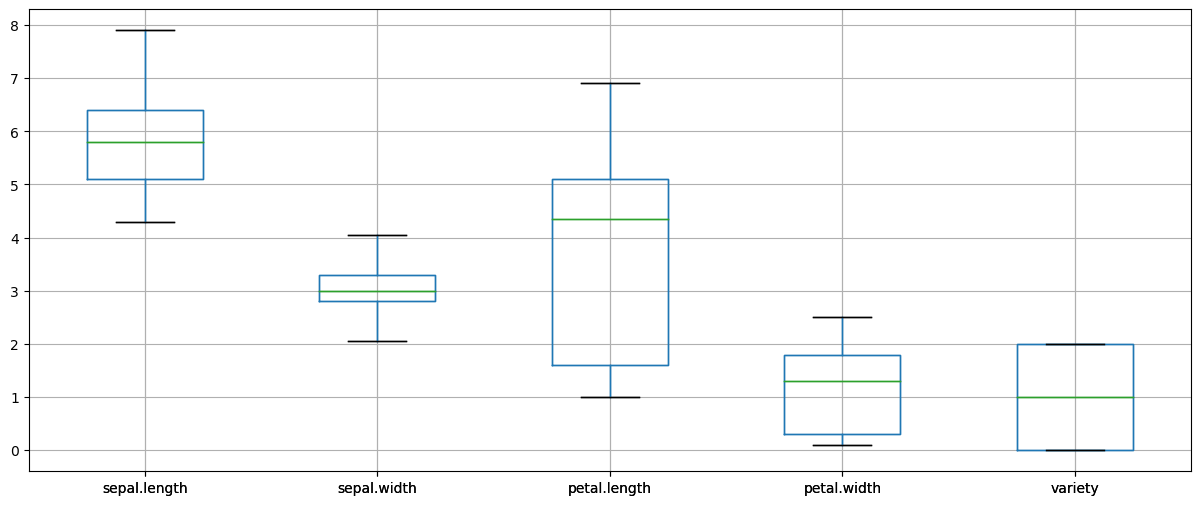

In [9]:
Q1 = df['sepal.width'].quantile(0.25)
Q3 = df['sepal.width'].quantile(0.75)
IQR = Q3 - Q1

# let's see how many outliers are in every column
df.loc[(df['sepal.width'] < (Q1 - 1.5 * IQR)), ['sepal.width']] = (Q1 - 1.5 * IQR) 
df.loc[(df['sepal.width'] > (Q3 + 1.5 * IQR)), ['sepal.width']] = (Q3 + 1.5 * IQR)

df.boxplot(figsize = (15,6))

# make a new boxplot to check if removing them worked
df.boxplot(figsize = (15,6))
plt.show()

In [10]:
#IQR is the interquartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# let's see how many outliers are in every column
df2 = ((df < (Q1 - 1.5 * IQR)).sum()) 
df3 = ((df > (Q3 + 1.5 * IQR)).sum())
print(df2)
print(df3)

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


### 3. Check distributions and coorelations

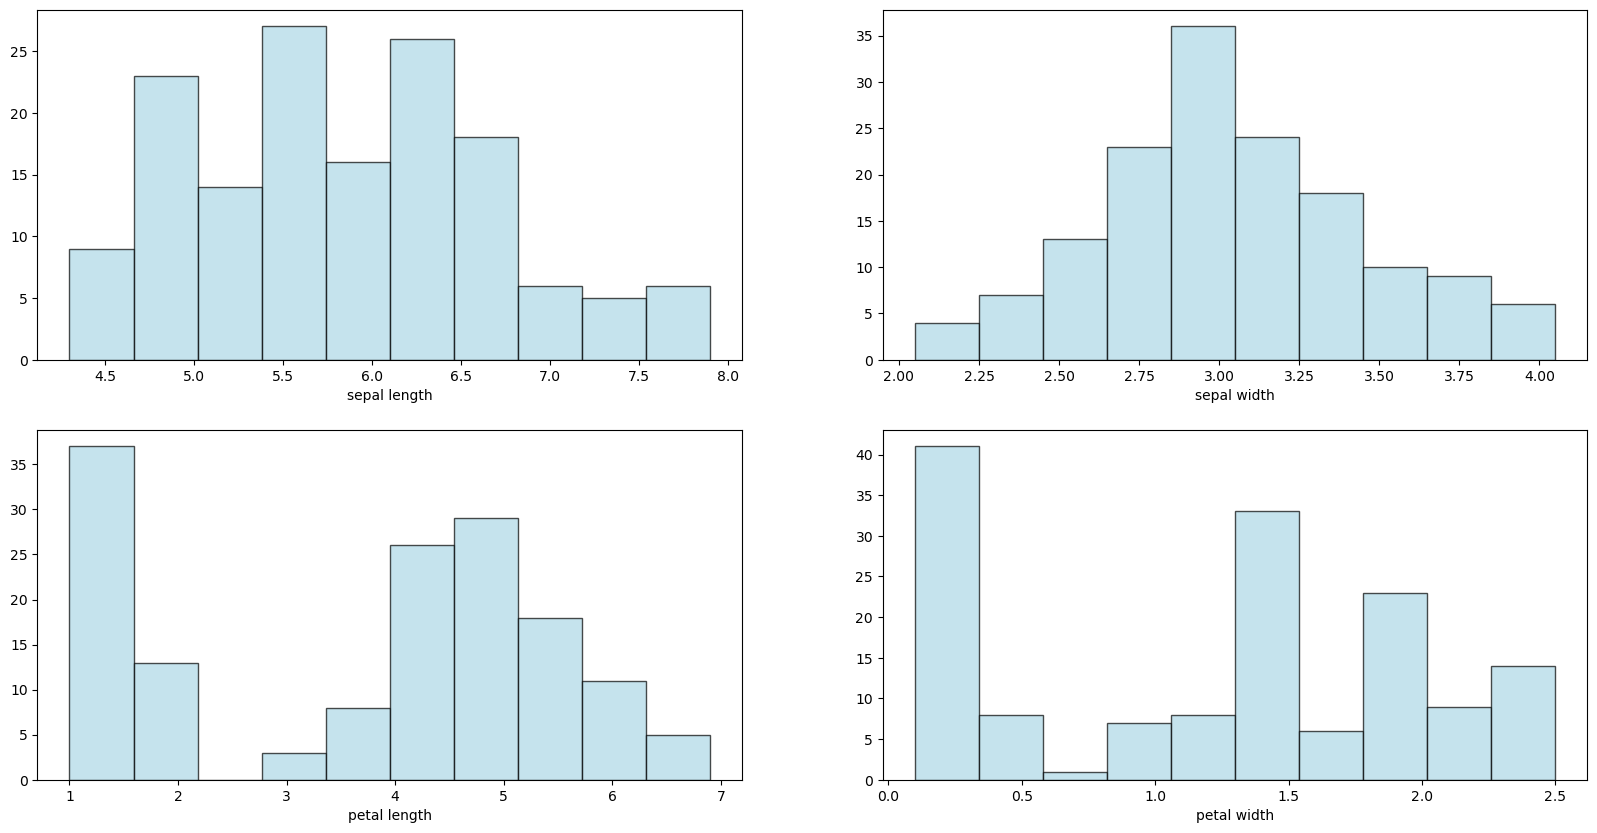

In [11]:
# what kind of distributions do the features have?

plt.figure(figsize= (20,10))
plt.subplot(2, 2, 1)
plt.hist(df['sepal.length'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('sepal length')

plt.subplot(2, 2, 2)
plt.hist(df['sepal.width'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('sepal width')

plt.subplot(2,2,3)
plt.hist(df['petal.length'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('petal length')

plt.subplot(2,2,4)
plt.hist(df['petal.width'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('petal width')
#plt.savefig('plots/i1.png')
plt.show()

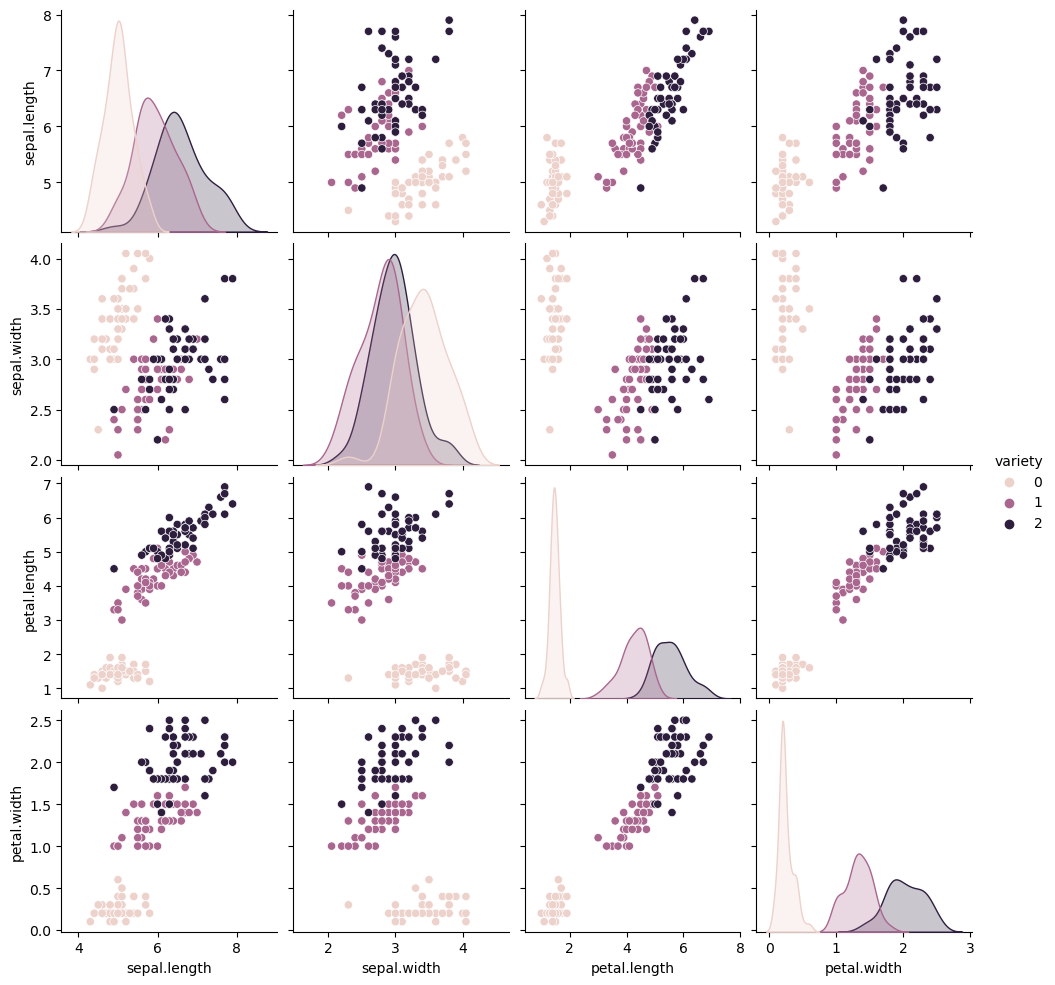

In [12]:
import seaborn as sns

# what kind of correlation does the data exhibit?

sns.pairplot(df, hue='variety')  #pairplot
#plt.savefig('plots/pairplot.png')
plt.show()

We can see that class 0 is cleary seperate and class 1 and 2 are tangled.

In [13]:
df.corr()

sepal.length  sepal.width  petal.length  petal.width   variety
sepal.length      1.000000    -0.118719      0.871754     0.817941  0.782561
sepal.width      -0.118719     1.000000     -0.427873    -0.365317 -0.426572
petal.length      0.871754    -0.427873      1.000000     0.962865  0.949035
petal.width       0.817941    -0.365317      0.962865     1.000000  0.956547
variety           0.782561    -0.426572      0.949035     0.956547  1.000000

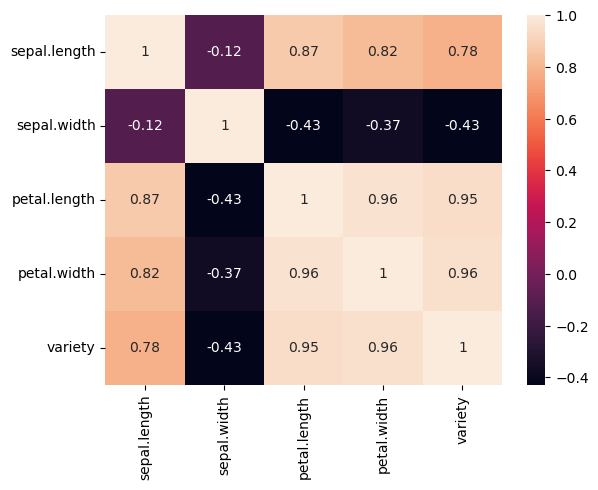

In [14]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Loading the Breast Cancer Wisconsin dataset

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# if the Breast Cancer dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df = pd.read_csv('wdbc.data', header=None)

df.head()

0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [16]:
df.shape

(569, 32)

B    357
M    212
Name: 1, dtype: int64


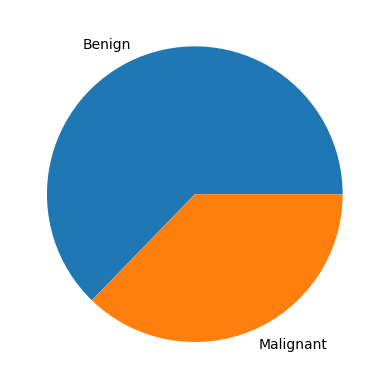

In [17]:
print(df[1].value_counts())
labels=["Benign", "Malignant"]
plt.pie(df[1].value_counts(), labels=labels)
plt.show()

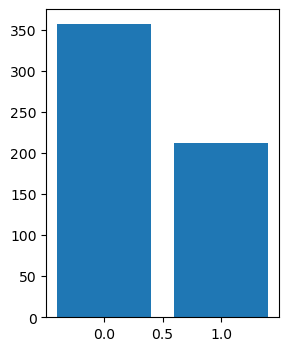

In [18]:
plt.figure(figsize=(3,4))
plt.bar([0, 1], df[1].value_counts())
plt.show()

## Undersample Benign

In [34]:
# Balance the classes
df.columns = df.columns.astype(str) 

malign_df = df[df['1'] == "M"]
benign_df = df[df['1'] == "B"][:212]

print(malign_df)
print(benign_df)
normal_distributed_df = pd.concat([malign_df, benign_df])

# Shuffle dataframe rows
bal_df = normal_distributed_df.sample(frac=1, random_state=42)

bal_df.head()

            0  1      2      3       4       5        6        7        8  \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926125  M  20.92  25.09  143.00  1347.0  0.10990  0.22360  0.31740   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   

           9  ...     22     23      24      25      26      27      28  \


0  1       2      3      4      5        6        7         8  \
297     892189  M  11.760  18.14  75.00  431.1  0.09968  0.05914  0.026850   
151  871001502  B   8.219  20.70  53.27  203.9  0.09405  0.13050  0.132100   
414     905680  M  15.130  29.81  96.71  719.5  0.08320  0.04605  0.046860   
309     893548  B  13.050  13.84  82.71  530.6  0.08352  0.03735  0.004559   
376     901315  B  10.570  20.22  70.15  338.3  0.09073  0.16600  0.228000   

            9  ...      22     23      24     25      26       27       28  \
297  0.035150  ...  13.360  23.39   85.10  553.6  0.1137  0.07974  0.06120   
151  0.021680  ...   9.092  29.72   58.08  249.8  0.1630  0.43100  0.53810   
414  0.027390  ...  17.260  36.91  110.10  931.4  0.1148  0.09866  0.15470   
309  0.008829  ...  14.730  17.40   93.96  672.4  0.1016  0.05847  0.01824   
376  0.059410  ...  10.850  22.82   76.51  351.9  0.1143  0.36190  0.60300   

          29      30       31  
297  0.07160  0.1978  0.06915  
151  0.07879  0.3322  0.14860  
414  0.06575  0.3233  0.06165  
309  0.03532  0.2107  0.06580  
376  0.14650  0.2597  0.12000  

[5 rows x 32 columns]

M    212
B    212
Name: 1, dtype: int64


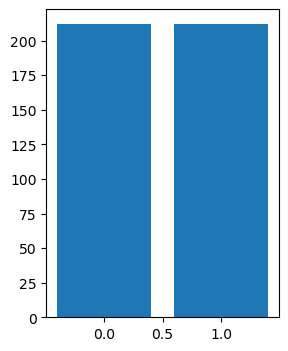

In [35]:
print(bal_df['1'].value_counts())

plt.figure(figsize=(3,4))
plt.bar([0, 1], bal_df['1'].value_counts())
plt.show()

## Important Notes for Over/Under Sampling

### Never test on the oversampled or undersampled dataset.
### Use the balanced dataset for training 
### Use original (unbalanced) dataset for testing